In [47]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]

In [48]:
df = pd.read_csv("Dataset1.csv")

/tmp/ipykernel_210817/2149461605.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")


In [49]:
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
df.dropna(subset=['LATITUDE', 'LONGITUDE'])
df.dropna(subset=['BOROUGH'])
df = df[df['LATITUDE']!=0]
df = df[df['LONGITUDE']!=0]

In [50]:
df1 = df[df['CONTRIBUTING FACTOR VEHICLE 1'] != "Unspecified"]
df1 = df1.sort_values(by=['CONTRIBUTING FACTOR VEHICLE 1'])
df2 = df[df['CONTRIBUTING FACTOR VEHICLE 2'] != "Unspecified"]
df2 = df2.sort_values(by=['CONTRIBUTING FACTOR VEHICLE 1'])
df_temp1 = df1.groupby(by=['CONTRIBUTING FACTOR VEHICLE 1'])
df_temp2 = df2.groupby(by=['CONTRIBUTING FACTOR VEHICLE 2'])

s3 = df_temp1.size().add(df_temp2.size(), fill_value=0)
print(s3.astype('int32'))

Accelerator Defective                                      140
Aggressive Driving/Road Rage                              1118
Alcohol Involvement                                       2420
Animals Action                                             129
Backing Unsafely                                          8232
Brakes Defective                                           904
Cell Phone (hand-held)                                      34
Cell Phone (hands-free)                                     87
Driver Inattention/Distraction                           40694
Driver Inexperience                                       4588
Drugs (Illegal)                                            188
Failure to Keep Right                                      608
Failure to Yield Right-of-Way                            14087
Fatigued/Drowsy                                          18625
Fell Asleep                                                507
Following Too Closely                                  

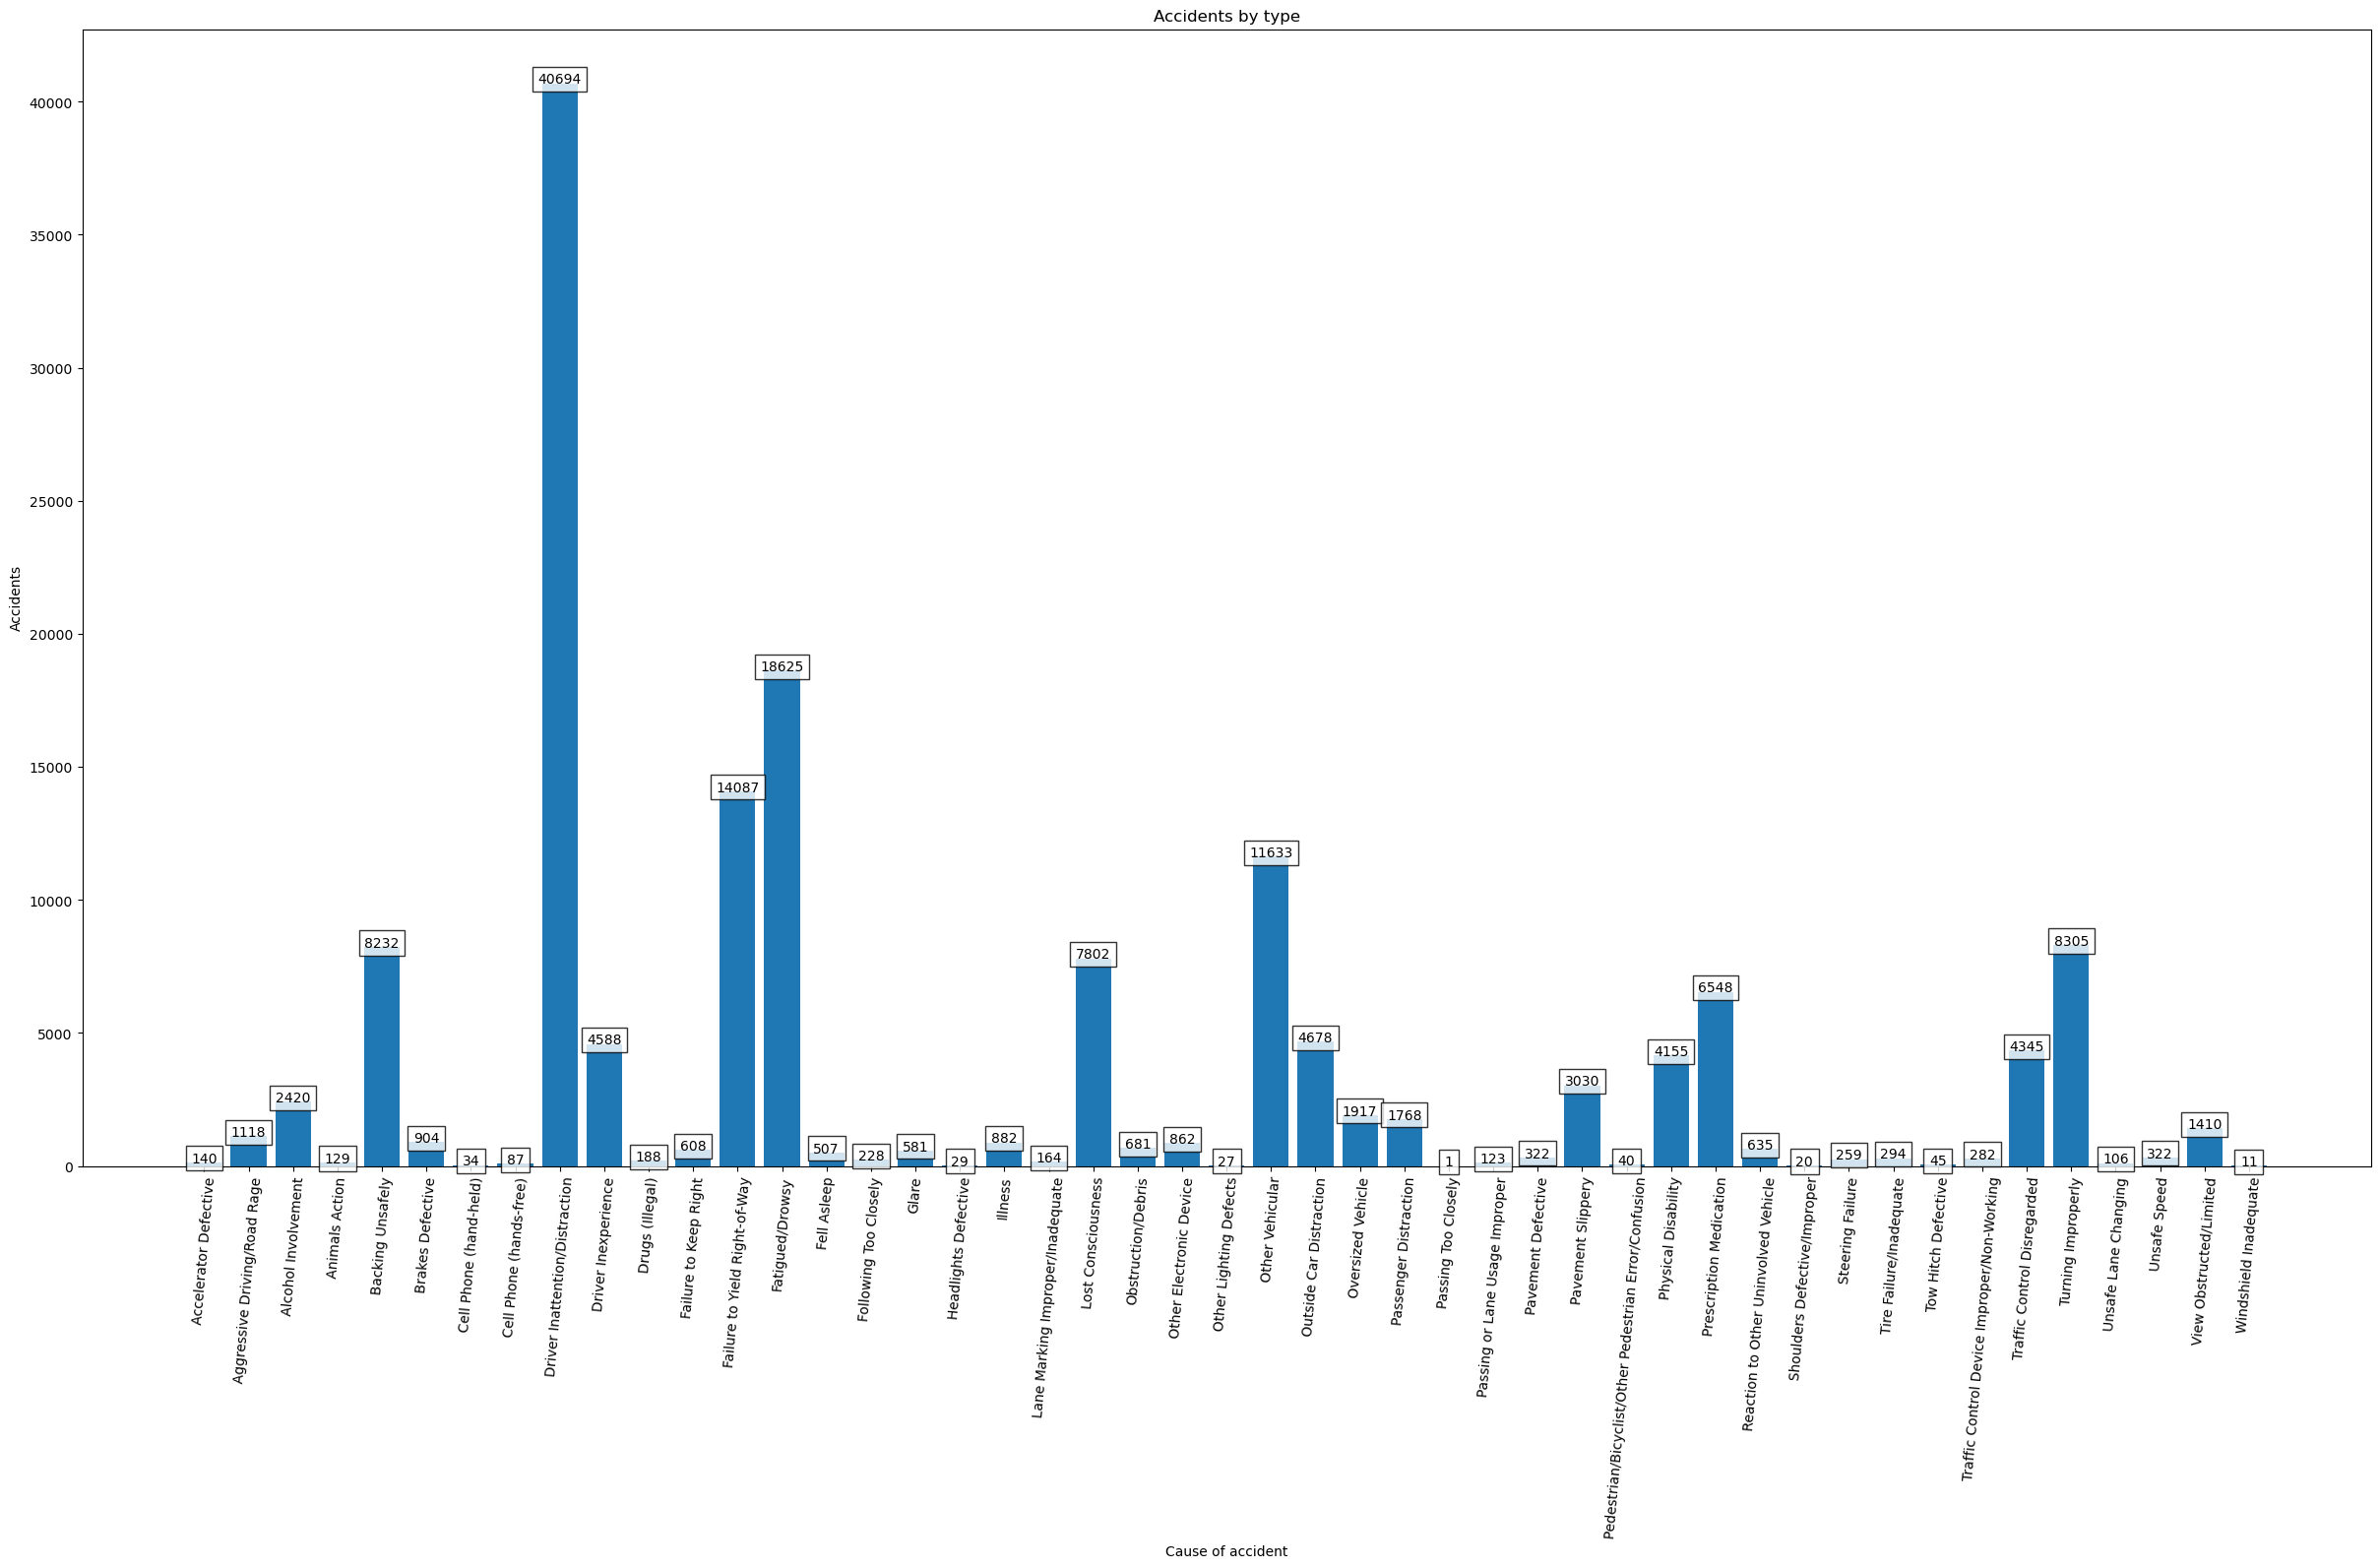

In [53]:
bars = s3.index
x_pos = range(len(s3))
plt.bar(x_pos, s3.values, width=0.8)
plt.xlabel("Cause of accident")
plt.ylabel("Accidents")
plt.title("Accidents by type")
plt.xticks(x_pos, bars, rotation = 85)
for i in range(len(s3)):
    plt.text(i, s3.astype('int32')[i], s3.astype('int32')[i], ha='center', bbox = dict(facecolor = 'white', alpha =.8))
plt.show()